# Análise dos dados

Neste notebook foi feita a análise dos dados focadondo na construção de um modelo preditivos.        


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from matplotlib.gridspec import GridSpec

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [71]:
#leitura dos dados
df = pd.read_csv(".//dados//dados_originais//dados_treinamento.csv" ,sep=',');
df.head(3)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,24.0,M,167.3,56.10,15.6,76.0,130.0,44.6,23.1,44.0,208.0,C
1,54.0,F,161.0,51.86,29.9,88.0,154.0,22.1,23.0,36.0,148.0,A
2,34.0,M,171.7,74.22,22.6,86.0,138.0,56.1,11.4,38.0,229.0,C


## Visão geral dos dados
Por meio das infomrações abaixo vemos que nos dados não existem pontos ausentes, assim não foi necessário incluir uma análise específica para estes pontos

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12053 entries, 0 to 12052
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      12053 non-null  float64
 1   gender                   12053 non-null  object 
 2   height_cm                12053 non-null  float64
 3   weight_kg                12053 non-null  float64
 4   body fat_%               12053 non-null  float64
 5   diastolic                12053 non-null  float64
 6   systolic                 12053 non-null  float64
 7   gripForce                12053 non-null  float64
 8   sit and bend forward_cm  12053 non-null  float64
 9   sit-ups counts           12053 non-null  float64
 10  broad jump_cm            12053 non-null  float64
 11  class                    12053 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.1+ MB


## Variável alvo:

A variável alvo é dada pela coluna **class**, sendo que esta possui 4 possíveis rótulos (cardinalidade).

Esta variável possui uma distribuição aproximadamente uniforme

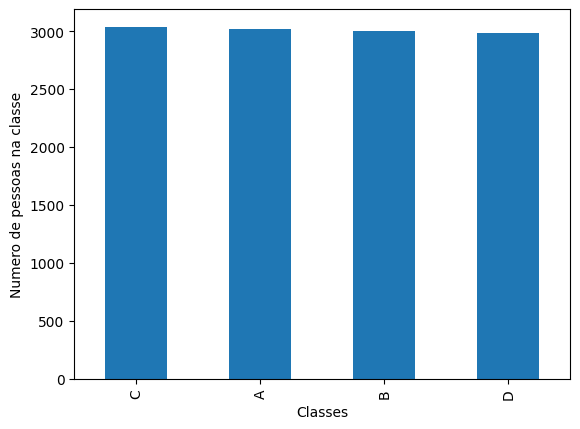

In [73]:
#distribuição das classes
df['class'].value_counts().plot(kind='bar')
plt.ylabel('Numero de pessoas na classe')
plt.xlabel('Classes')
plt.show()

## Variáveis categóricas

In [8]:
#Seleciona variáveis categóricas
vars_cat = [var for var in df.columns if df[var].dtype == 'O' and var != 'class']
vars_cat

['gender']

In [9]:
#cardinalidade (número de rótulos diferentes)
df[vars_cat].nunique()

gender    2
dtype: int64

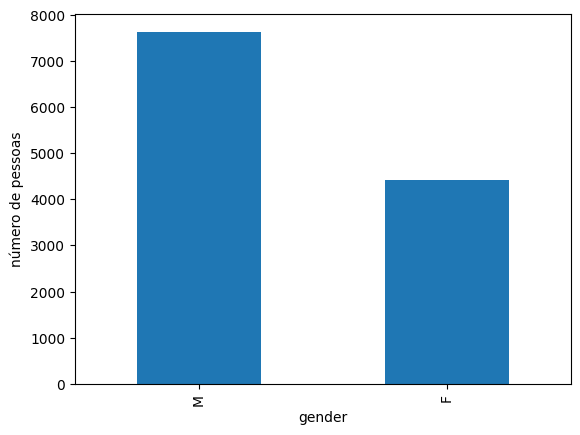

In [10]:
#Histograma(distribuição):
df['gender'].value_counts().plot(kind='bar')
plt.xlabel('gender')
plt.ylabel('número de pessoas')
plt.show()

## Variáveis numéricas

In [11]:
#Seleciona variáveis numéricas, discretas e contínuas
vars_num = [var for var in df.columns if df[var].dtype != 'O']
vars_discr=[var for var in vars_num if len(df[var].unique()) < 40]
vars_count=[var for var in vars_num if var not in vars_discr]

print("Numéricas: \n",vars_num)
print("\nNuméricas discretas: \n",vars_discr)
print("\nNuméricas contínuas: \n",vars_count)

Numéricas: 
 ['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']

Numéricas discretas: 
 []

Numéricas contínuas: 
 ['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']


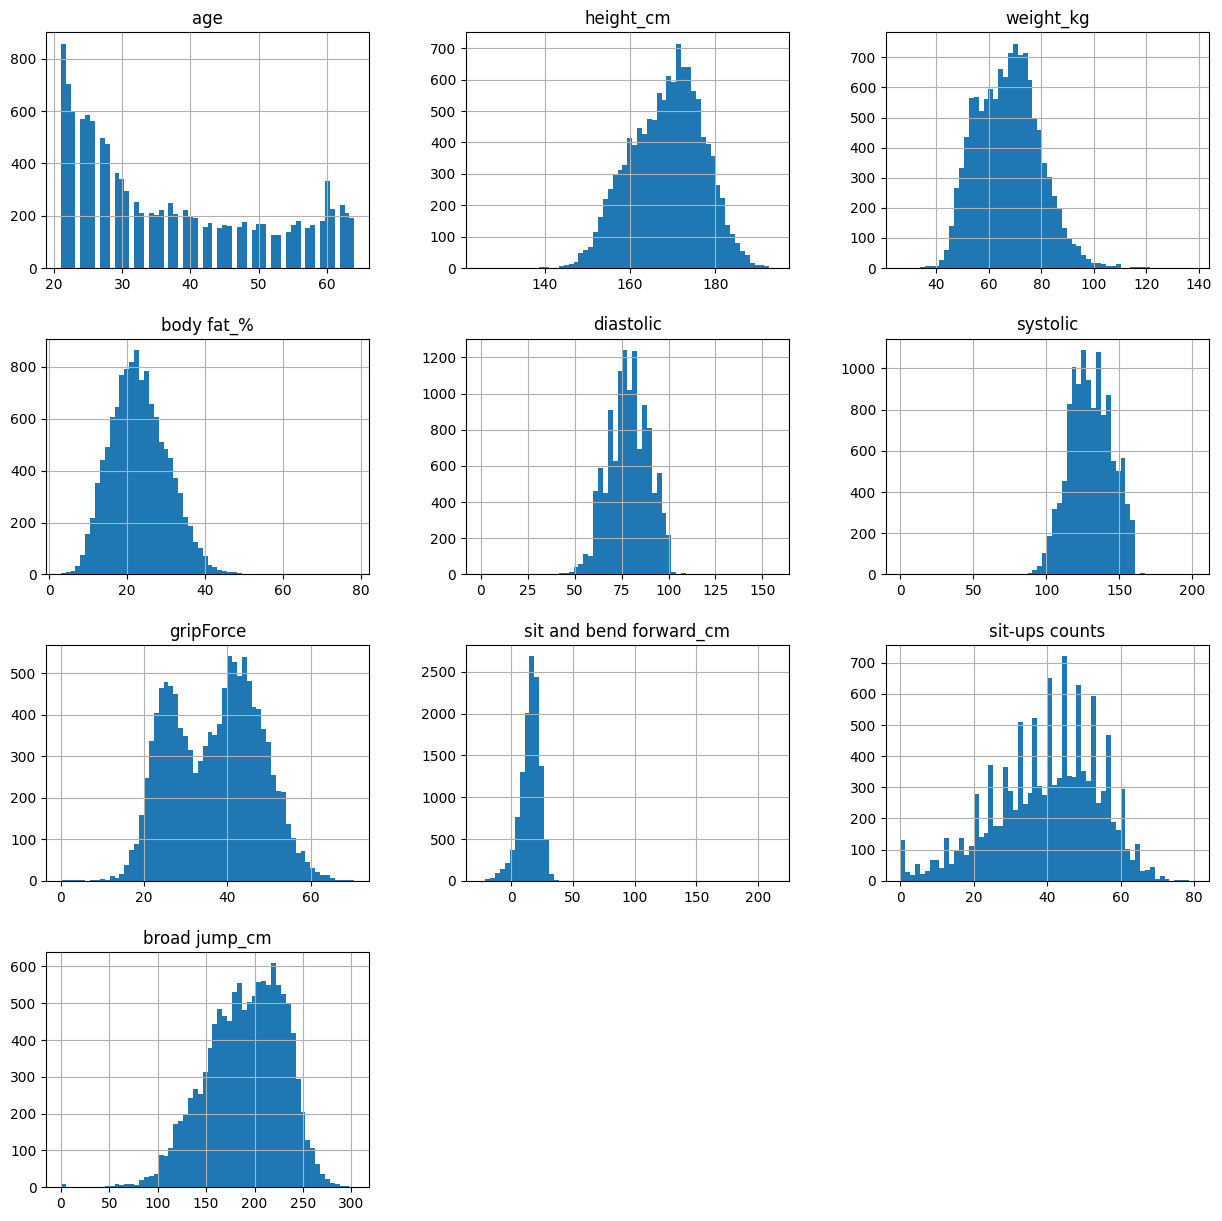

In [12]:
# Histogramas (distribuições):
df[vars_count].hist(bins=60, figsize=(15,15))
plt.show()

## Aplica as transformações

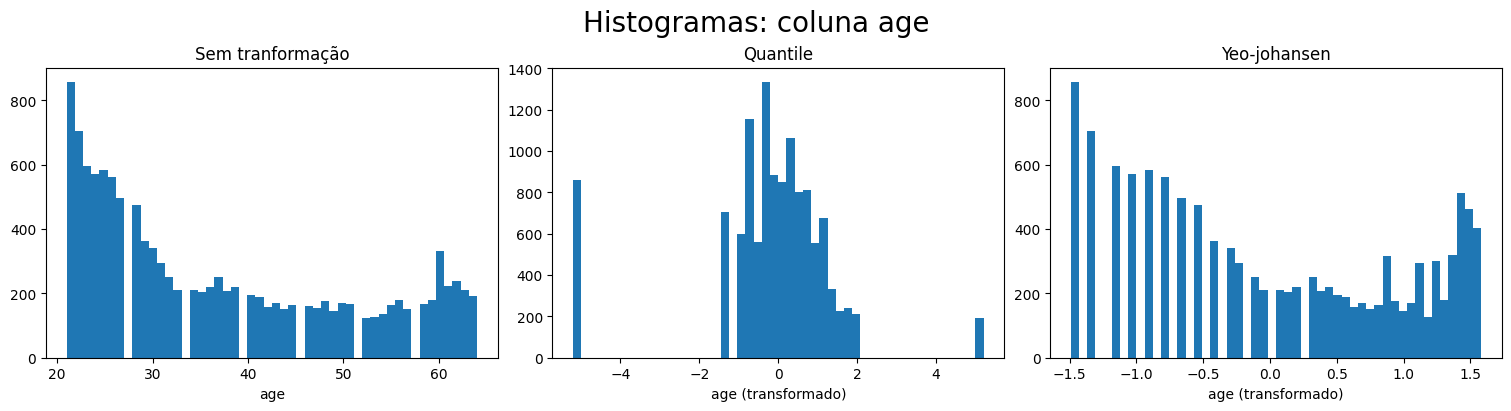

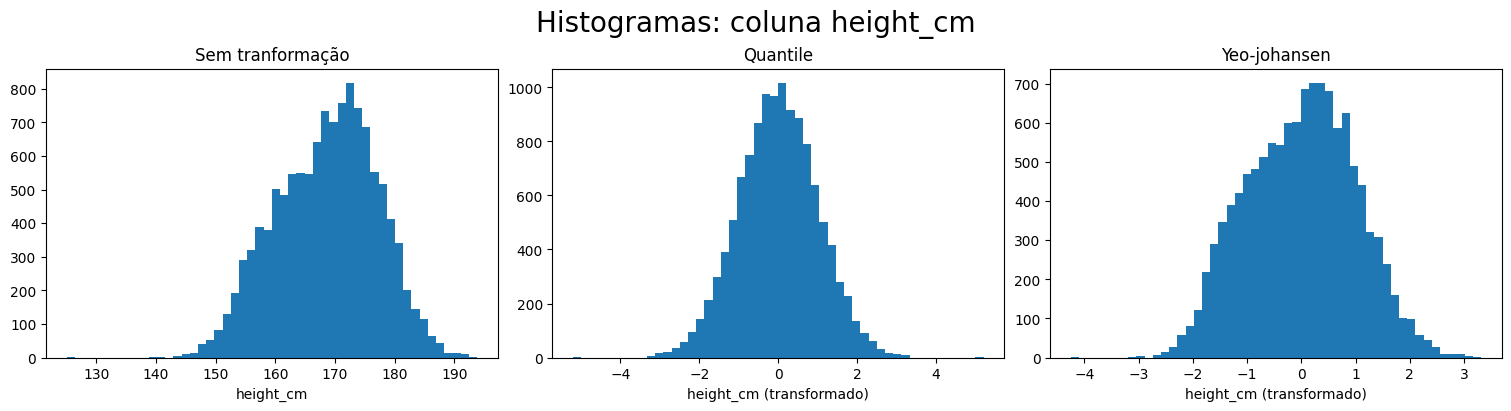

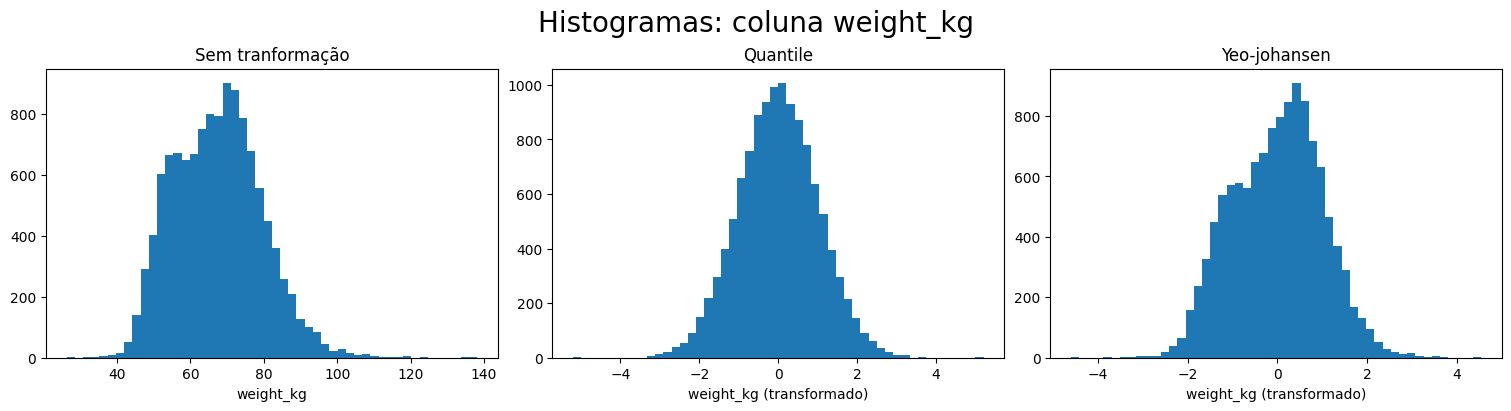

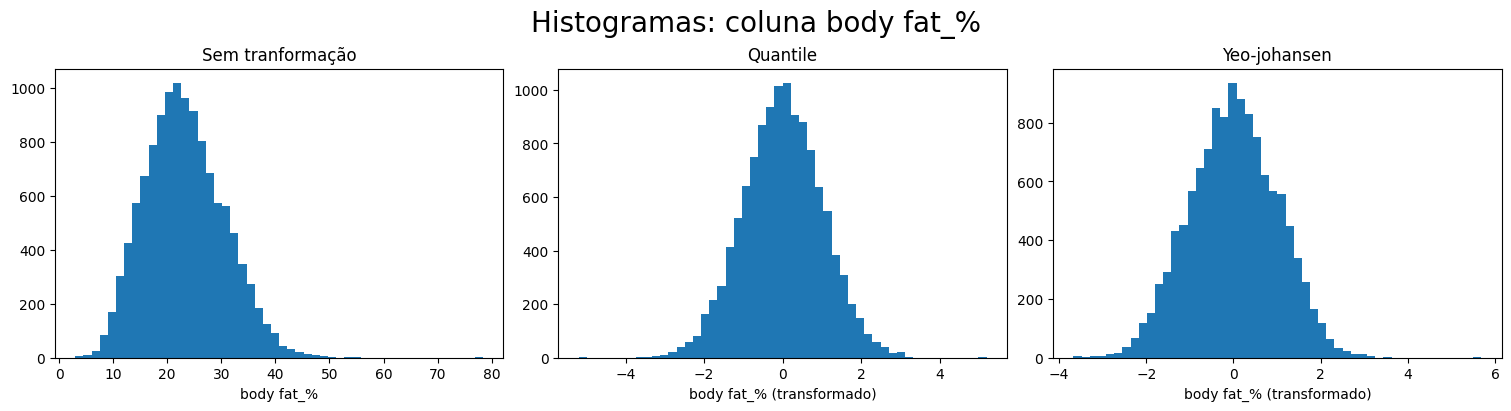

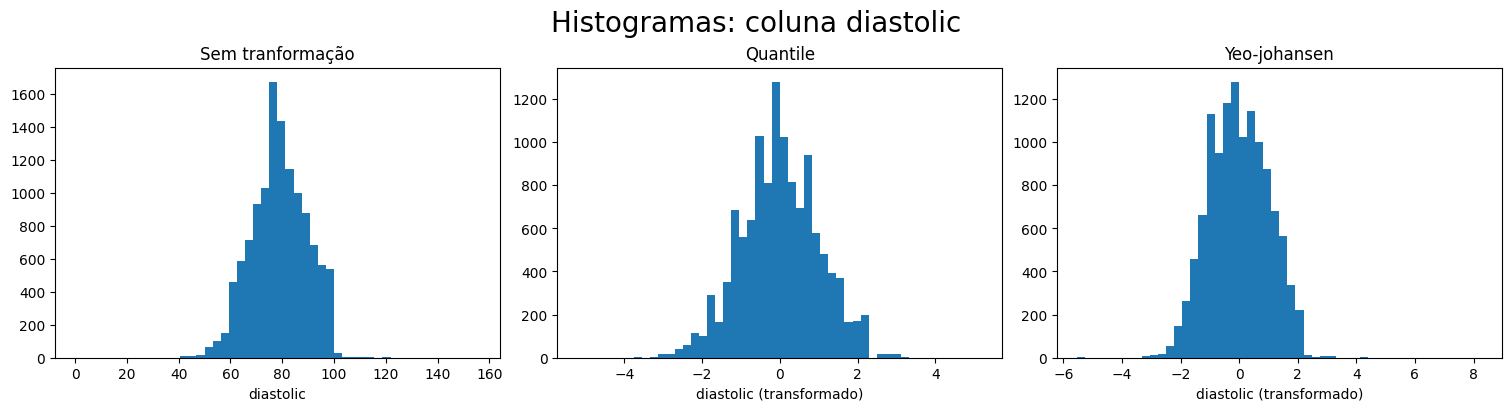

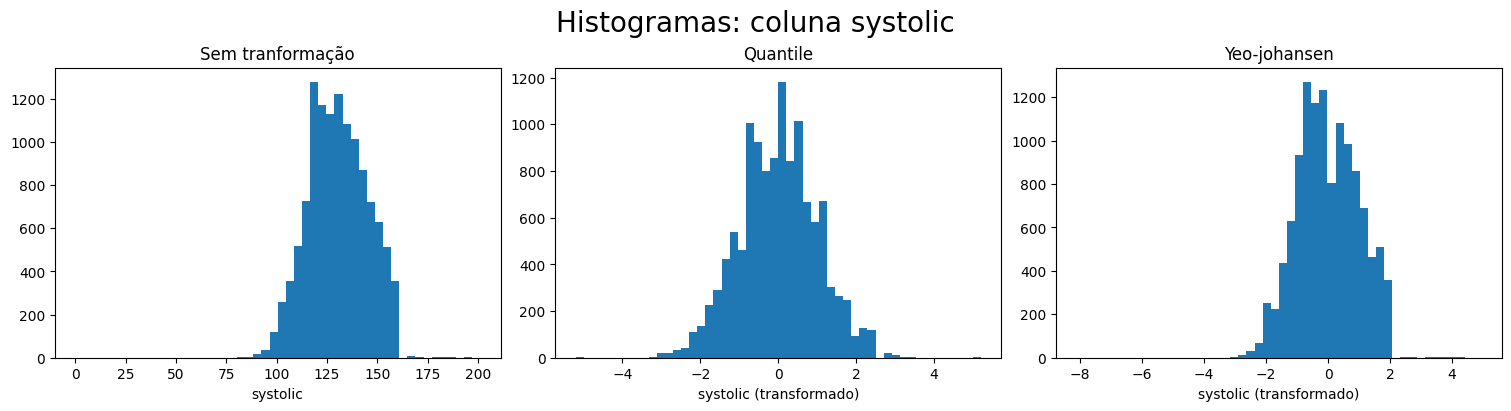

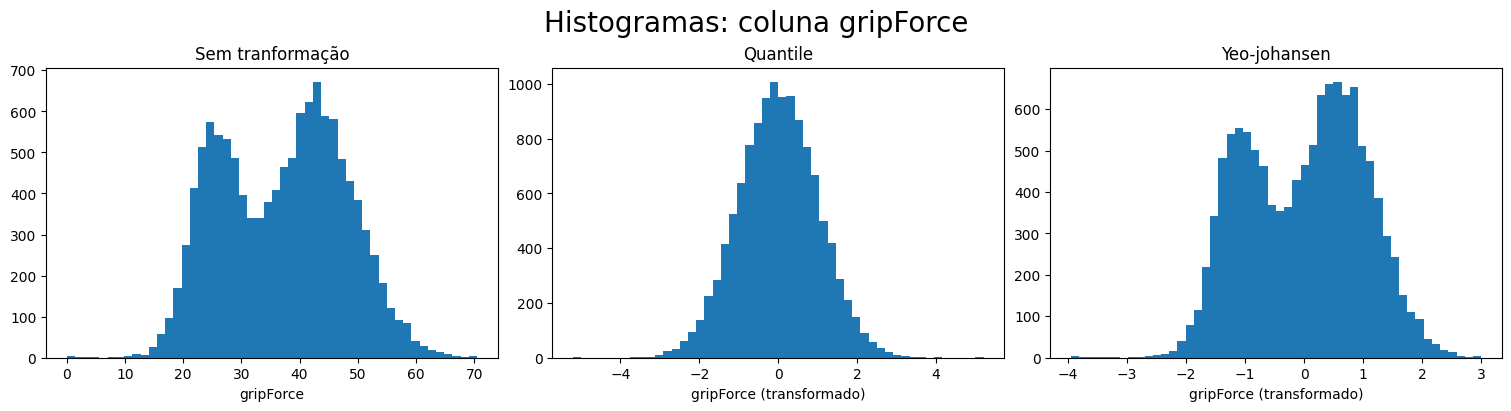

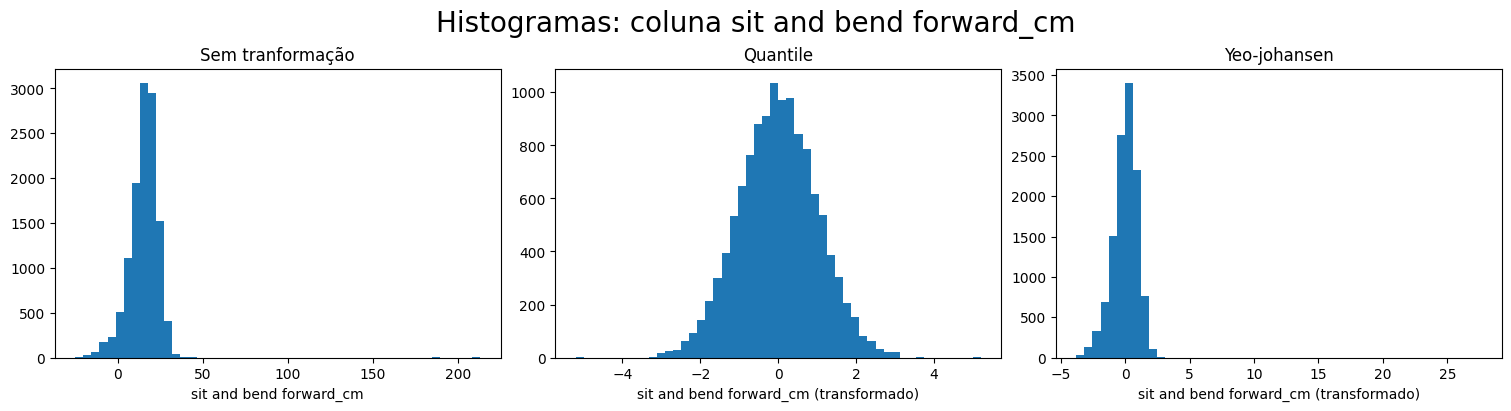

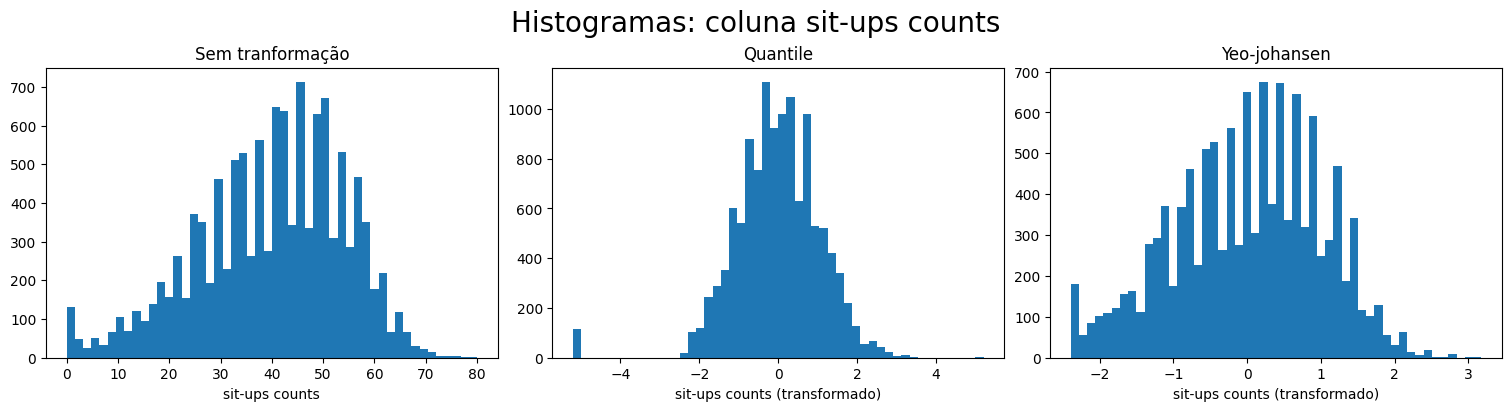

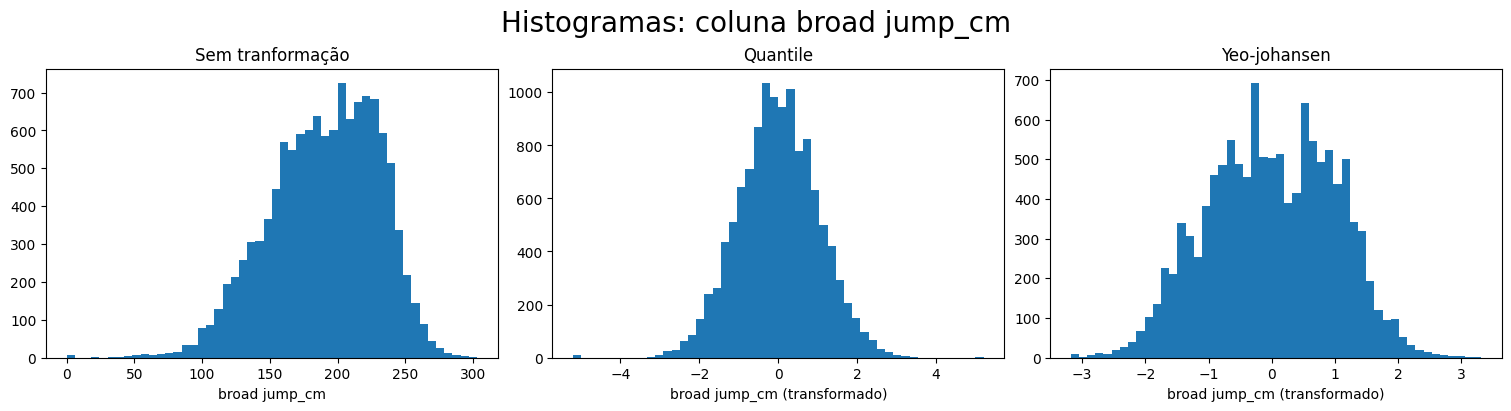

In [75]:
#livro: estatistica multivariada
#https://www.amazon.com.br/An%C3%A1lise-Estat%C3%ADstica-Multivariada-Abordagem-Aplicada/dp/857041451X/ref=pd_sbs_sccl_2_2/145-3082532-9429566?pd_rd_w=5fFh3&content-id=amzn1.sym.d27ac626-cb3c-4c30-830f-0fd405f2510f&pf_rd_p=d27ac626-cb3c-4c30-830f-0fd405f2510f&pf_rd_r=BCVXX0VGHNV82QC072K4&pd_rd_wg=jitH6&pd_rd_r=f37ffab6-8bdf-436a-be88-93b82ef0a008&pd_rd_i=857041451X&psc=1

listaVar=['age',
 'height_cm',
 'weight_kg',
 'body fat_%',
 'diastolic',
 'systolic',
 'gripForce',
 'sit and bend forward_cm',
 'sit-ups counts',
 'broad jump_cm'
  ]

for var in listaVar:
    
    fig = plt.figure(constrained_layout=True, figsize=(15, 4))  #cria a figura        
    fig.suptitle('Histogramas: coluna '+var, fontsize=20)
    
    gs = GridSpec(1, 3, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2])
    
    #variavel alvo
    var_alvo=df['class']          
        
    #variável sem transformações
    X =df[var].values.reshape(-1, 1)        
    
    #variável com transformações (quantile e yeo)    
    X_quantile = QuantileTransformer(output_distribution="normal").fit_transform(X)
    X_yeo = PowerTransformer(method="yeo-johnson").fit_transform(X)

    
    # histograma: sem transformação    
    ax1.hist(X, bins=50)
    ax1.set_title('Sem tranformação')
    ax1.set_xlabel(var)    
    
    # histograma: transf. quantile
    ax2.hist(X_quantile, bins=50)
    ax2.set_title('Quantile')
    ax2.set_xlabel(var+" (transformado)")   
    
    
    # histograma: transf. yeo-johansen
    ax3.hist(X_yeo, bins=50)
    ax3.set_title('Yeo-johansen')
    ax3.set_xlabel(var+" (transformado)") 
    
    plt.show()

## Heatmaps das correlações

In [15]:
#----fazer o heatmap para os 3 casos (sem transformação, quatile, heo johanson)